In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path='/content/gdrive/My Drive/NIC_2020/Assignment_1_PSO/'


Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import math

In [ ]:
def levi(x,y):
  fun = ((np.sin(3*np.pi*x))**2) + (((x-1)**2)*(1+(np.sin(3*np.pi*y))**2)) + (((y-1)**2)*(1+(np.sin(2*np.pi*y))**2))
  return fun

#global min at (1,1) = 0

In [ ]:
def plot_levi(particle_positions,iteration_no,gbest):
	
	particle_pos_x=[i[0] for i in particle_positions]
	particle_pos_y=[i[1] for i in particle_positions]
	levi_values=[levi(i[0],i[1]) for i in particle_positions]
	X = np.arange(-10,10,0.01)
	Y = np.arange(-10,10,0.01)
	X,Y = np.meshgrid(X,Y)
	fig, ax = plt.subplots(figsize=(5,5))
	ax = plt.axes(projection='3d')
	ax.scatter(particle_pos_x,particle_pos_y,levi_values,c='g',label='particles')
	ax.scatter(gbest[0],gbest[1],levi(gbest[0],gbest[1]),c='r',label='gbest')
	ax.plot_surface(X,Y,levi(X,Y),cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.1)
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.legend()
	ax.set_title('particles and \n gbest@Iter: {}'.format(iteration_no+1))
	plt.savefig(path+'saved_images/gbest_iter_{}.png'.format(iteration_no+1), dpi=400, bbox_inches='tight')
	plt.show()
	plt.close()

In [ ]:
class Particle(object):
	def __init__(self,position):
		self.pos = position
		self.vel = 0
		self.cost = self.comp_cost()
		self.pbest_pos = position
		self.pbest_cost = self.cost
	
	def comp_cost(self):
		return levi(self.pos[0],self.pos[1])

	def update_pbest(self,position):
		self.pbest_pos = position
		self.pbest_cost = levi(self.pbest_pos[0],self.pbest_pos[1])


In [ ]:
search_space_min = -10
search_space_max = 10

#below params are chosen by trial and error method. These are the ones which performed better.
max_iter = 50
pop_size = 10 
alpha = 0.5 # Inertia Coefficient
dampping = 0.99 # Damping coefficient
c1 = 0.9
c2 = 0.9

particles = [0 for i in range(pop_size)] # Initializing particles array

gbest = Particle(np.array([10,10]))
gbest.cost = np.inf

#initialising particles randomly
for i in range(pop_size):
	particles[i] = Particle(np.array([np.random.uniform(-10,10),np.random.uniform(-10,10)]))
	if(particles[i].pbest_cost<gbest.cost):
		gbest.pos = particles[i].pos
		gbest.cost = gbest.comp_cost()


In [ ]:
gbest_costs = [0 for i in range(max_iter)]
gbest_positions = [0 for i in range(max_iter)]
particle_positions_for_each_iter=[[0 for j in range(pop_size)] for i in range(max_iter)]

In [ ]:
#iterating over to reach best pos

for i in range(max_iter):
	particle_positions=[0 for i in range(pop_size)]
	for j in range(pop_size):
		vel_dash = alpha*particles[j].vel	+ c1*np.random.rand()*(particles[j].pbest_pos - particles[j].pos) + c2*np.random.rand()*(gbest.pos - particles[j].pos)

		pos_dash = particles[j].pos + vel_dash
		particle_positions[j] = pos_dash
	
		if (((particles[j].pos[0])<=search_space_max and (particles[j].pos[0])>=search_space_min) and ((particles[j].pos[1])<=search_space_max and (particles[j].pos[1])>=search_space_min)):
			particles[j].vel = vel_dash
			particles[j].pos = pos_dash
			particles[j].cost = particles[j].comp_cost()

			if (particles[j].cost<particles[j].pbest_cost):
				particles[j].update_pbest(particles[j].pos)

				if (particles[j].pbest_cost<gbest.cost):
					gbest.pos = particles[j].pbest_pos
					gbest.cost = gbest.comp_cost()
		 
	particle_positions_for_each_iter[i] = particle_positions
	gbest_costs[i] = gbest.cost
	gbest_positions[i] = gbest.pos
	print('Iteration: {2}, Position: {0}, Cost: {1}'.format(gbest.pos,gbest.cost,i+1))
	alpha = alpha * dampping


Iteration: 1, Position: [1.60372051 0.20145563], Cost: 2.2215465214295462
Iteration: 2, Position: [1.60372051 0.20145563], Cost: 2.2215465214295462
Iteration: 3, Position: [0.91757706 1.30482426], Cost: 0.6739317611553479
Iteration: 4, Position: [1.3608045  0.89900241], Cost: 0.29587945477488575
Iteration: 5, Position: [1.3608045  0.89900241], Cost: 0.29587945477488575
Iteration: 6, Position: [1.3608045  0.89900241], Cost: 0.29587945477488575
Iteration: 7, Position: [1.34696274 0.96984806], Cost: 0.1471971703538773
Iteration: 8, Position: [1.34696274 0.96984806], Cost: 0.1471971703538773
Iteration: 9, Position: [1.34696274 0.96984806], Cost: 0.1471971703538773
Iteration: 10, Position: [1.32553421 0.99138579], Cost: 0.11213717156117232
Iteration: 11, Position: [1.00116172 0.92405254], Cost: 0.007106552982443139
Iteration: 12, Position: [1.00116172 0.92405254], Cost: 0.007106552982443139
Iteration: 13, Position: [1.00116172 0.92405254], Cost: 0.007106552982443139
Iteration: 14, Position:

In [ ]:
def plot_gbest_vs_iter(gbest_costs):
	plt.plot(np.arange(0,len(gbest_costs)),gbest_costs)
	plt.title('Fitness of gbest v/s iterations')
	plt.xlabel('Number of iterations')
	plt.ylabel('Fitness of gbest particle')
	plt.grid()
	plt.savefig(path+'fitness_gbest_vs_iter.png')
  #plt.show()
	plt.close()

plot_gbest_vs_iter(gbest_costs)

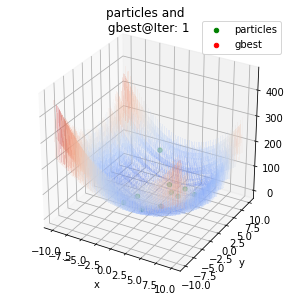

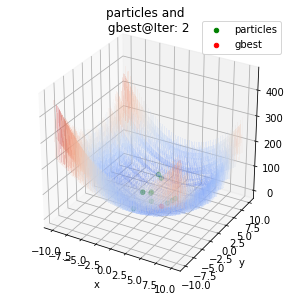

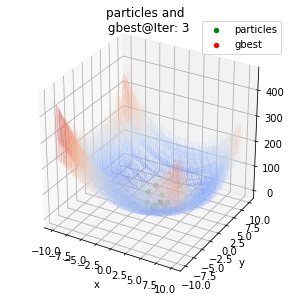

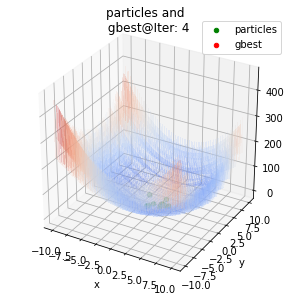

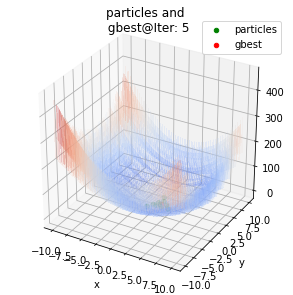

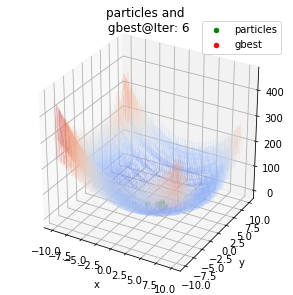

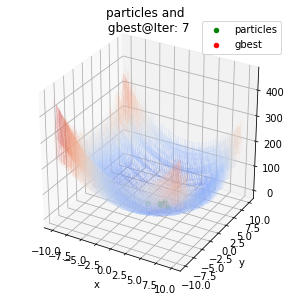

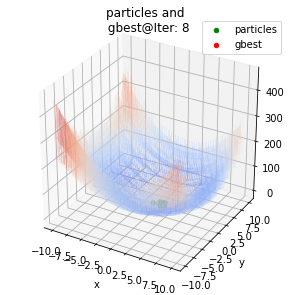

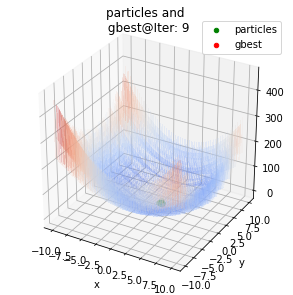

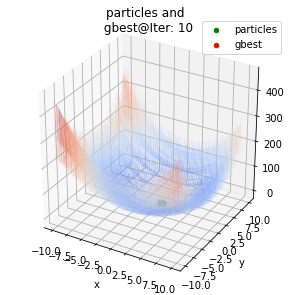

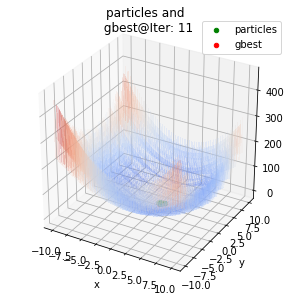

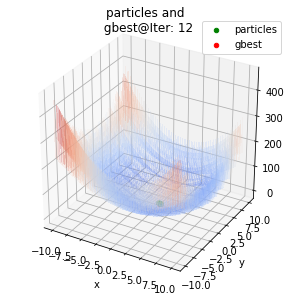

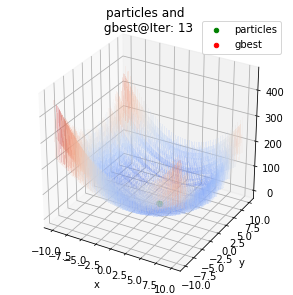

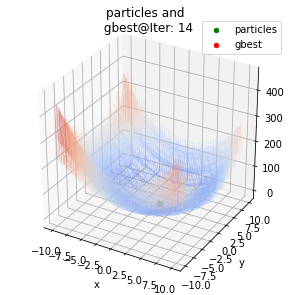

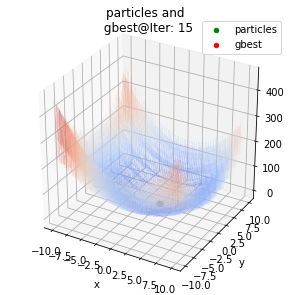

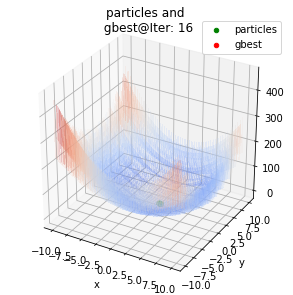

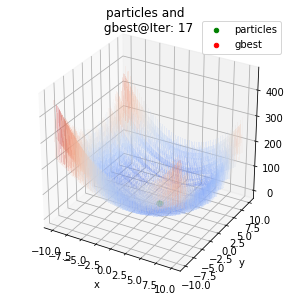

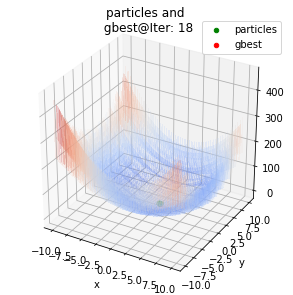

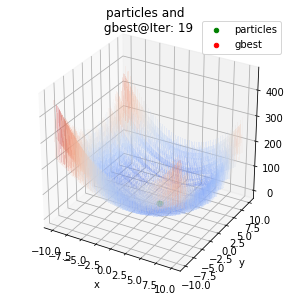

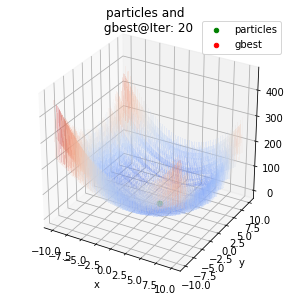

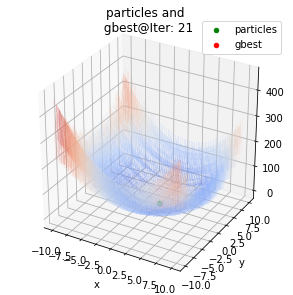

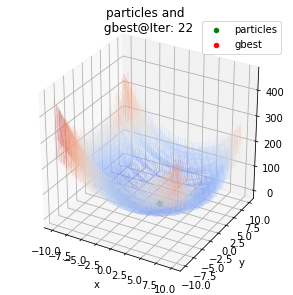

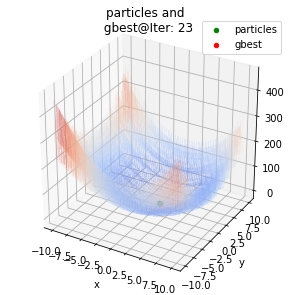

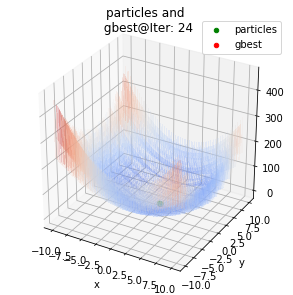

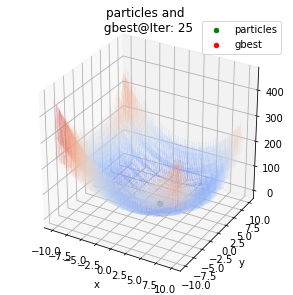

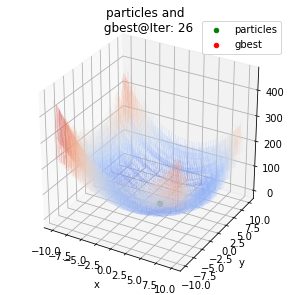

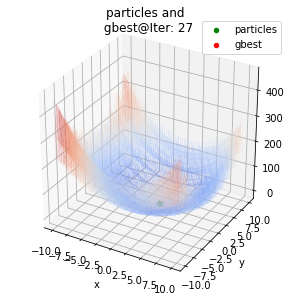

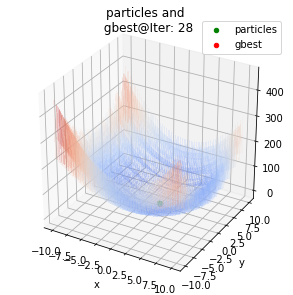

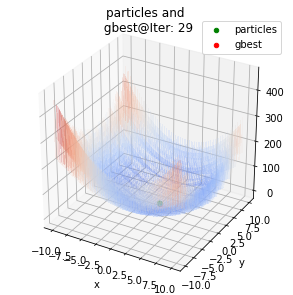

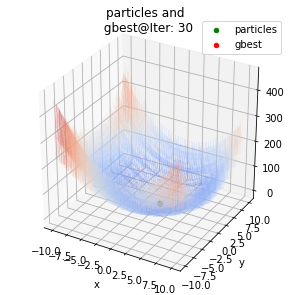

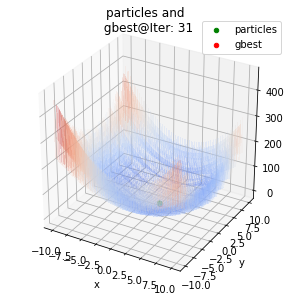

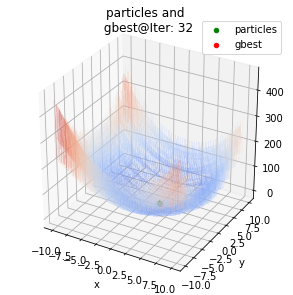

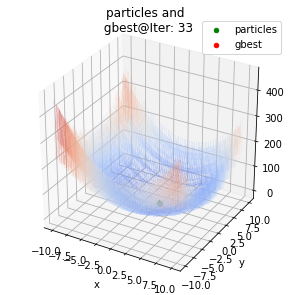

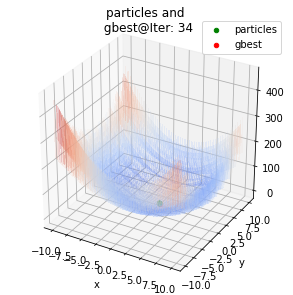

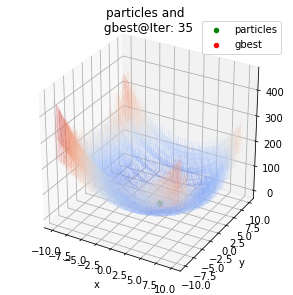

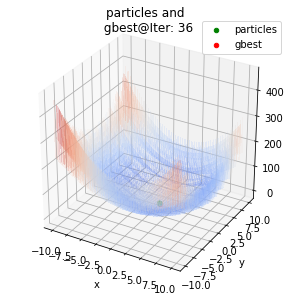

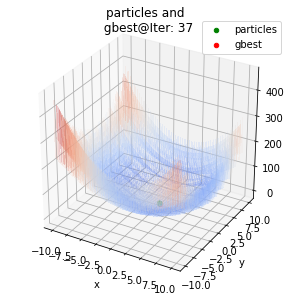

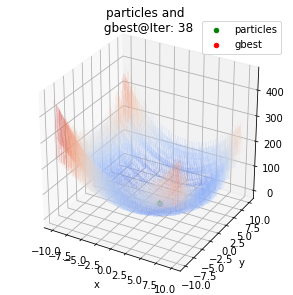

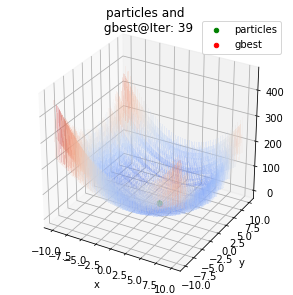

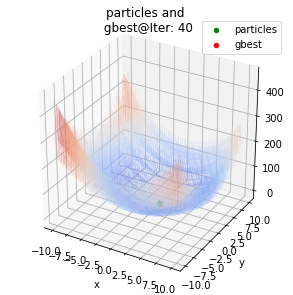

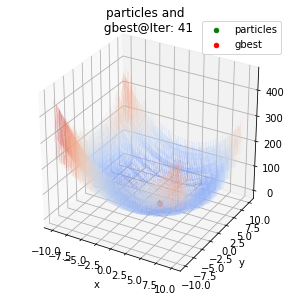

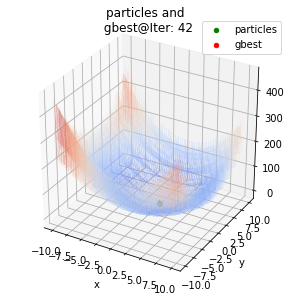

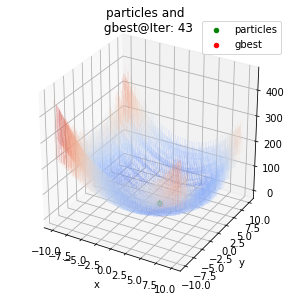

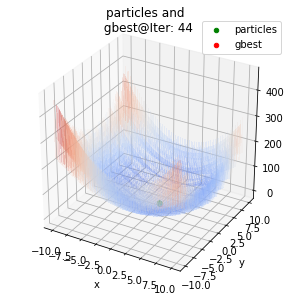

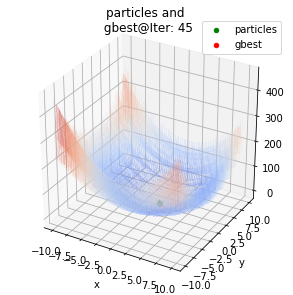

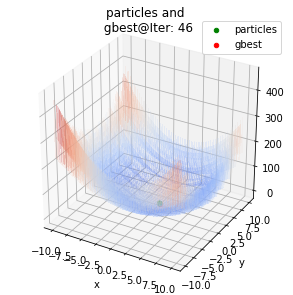

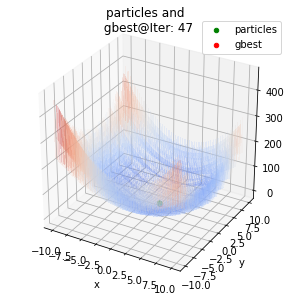

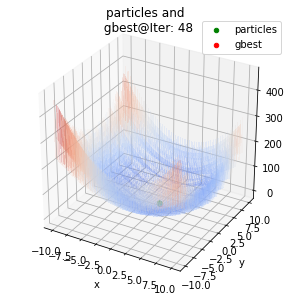

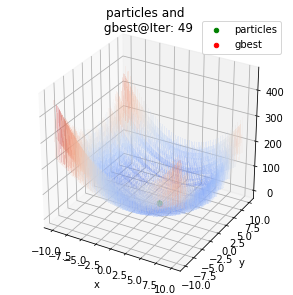

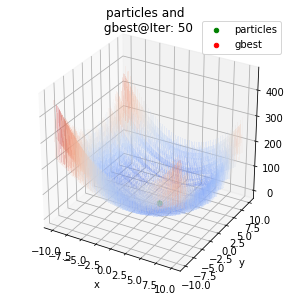

In [ ]:
for i in range(max_iter):
	plot_levi(particle_positions_for_each_iter[i],i,gbest_positions[i])
